# System doradczy oparty na logice rozmytej, który wspiera podejmowanie decyzji, czy zwiększyć produkcję danego produktu. 


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


Tego rodzaju systemy mają coraz większe znaczenie we współczesnym przemyśle i biznesie, gdzie decyzje produkcyjne muszą być podejmowane dynamicznie i często w warunkach niepewności. W sytuacjach, gdy dane są nieprecyzyjne, rozmyte lub trudne do jednoznacznej interpretacji, klasyczne modele decyzyjne mogą być niewystarczające. Dlatego logika rozmyta znajduje szerokie zastosowanie jako narzędzie wspierające inteligentne podejmowanie decyzji.


Znaczenie tego typu systemu doradczego na rynku jest duże, zwłaszcza w firmach produkcyjnych, które muszą balansować między rosnącym popytem, ograniczoną pojemnością magazynową oraz zmieniającymi się kosztami wytwarzania. Wdrożenie takiego podejścia może przyczynić się do lepszego planowania produkcji, optymalizacji kosztów i unikania strat związanych z nadprodukcją lub niedoborem towaru.


W zaprojektowanym systemie wykorzystałam **trzy zmienne wejściowe**, które mają kluczowe znaczenie przy podejmowaniu decyzji o skali produkcji:

- Popyt rynkowy – określa, jak duże jest zapotrzebowanie na dany produkt. Wysoki popyt może sugerować konieczność zwiększenia produkcji, podczas gdy niski może prowadzić do jej ograniczenia.

- Poziom zapasów magazynowych – informuje o bieżącym stanie produktów gotowych. Niskie zapasy mogą wymagać szybkiego uzupełnienia, natomiast zbyt wysokie wskazują na ryzyko nadprodukcji.

- Koszt produkcji jednostkowej – uwzględnia ekonomikę wytwarzania. Wysokie koszty mogą zniechęcać do zwiększania produkcji, nawet przy wysokim popycie, natomiast niskie koszty sprzyjają ekspansji.

**Zmienna wyjściowa** w systemie to rekomendacja dotycząca zmiany poziomu produkcji. W oparciu o wartości zmiennych wejściowych (popyt, zapasy, koszt produkcji), system określa stopień potrzeby dostosowania skali produkcji.

Zdecydowałam się zastosować pięć poziomów wyjściowych, aby lepiej oddać niuanse rzeczywistych decyzji:
Przedział został rozszerzony do wartości od −10 do 10, gdzie:

- wartości ujemne oznaczają konieczność zmniejszenia produkcji,

- wartości dodatnie sugerują potrzebę zwiększenia produkcji,

- a wartość 0 reprezentuje decyzję o utrzymaniu obecnego poziomu.

Ten układ umożliwia naturalną interpretację wyniku końcowego – np. wartość −6 może być odczytana jako "zmniejsz produkcję o 60%", natomiast +8 jako "zwiększ produkcję o 80%".


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


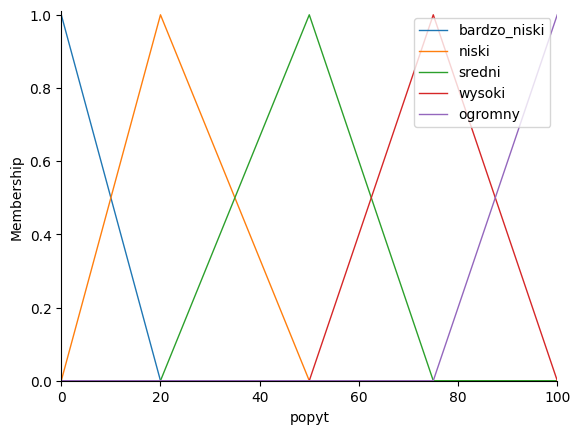

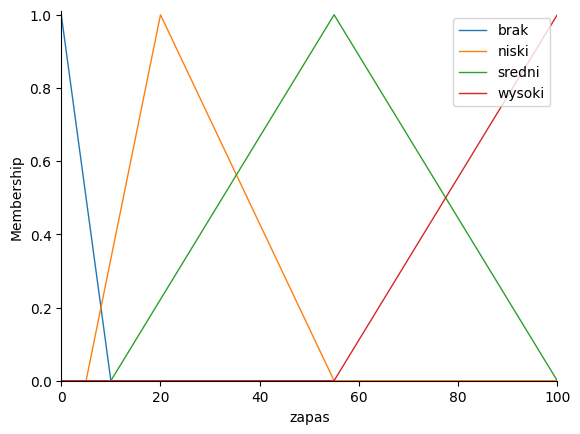

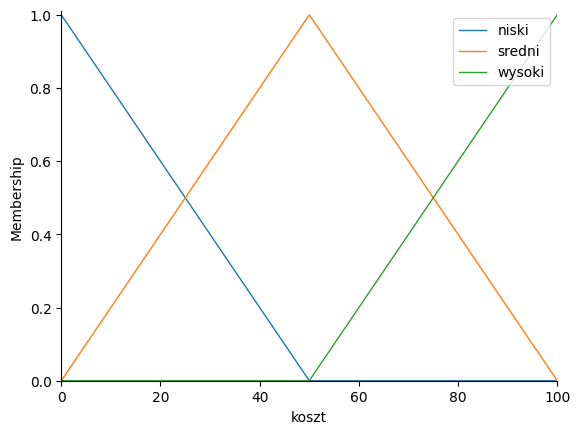

In [2]:
popyt = ctrl.Antecedent(np.arange(0, 101, 1), 'popyt')
zapas = ctrl.Antecedent(np.arange(0, 101, 1), 'zapas')
koszt = ctrl.Antecedent(np.arange(0, 101, 1), 'koszt')

popyt['bardzo_niski'] = fuzz.trimf(popyt.universe, [0, 0, 20])
popyt['niski'] = fuzz.trimf(popyt.universe, [0, 20, 50])
popyt['sredni'] = fuzz.trimf(popyt.universe, [20, 50, 75])
popyt['wysoki'] = fuzz.trimf(popyt.universe, [50, 75, 100])
popyt['ogromny'] = fuzz.trimf(popyt.universe, [75, 100, 100])

popyt.view()
plt.legend(loc=1)
plt.show()

zapas['brak'] = fuzz.trimf(zapas.universe, [0, 0, 10])
zapas['niski'] = fuzz.trimf(zapas.universe, [5, 20, 55])
zapas['sredni'] = fuzz.trimf(zapas.universe, [10, 55, 100])
zapas['wysoki'] = fuzz.trimf(zapas.universe, [55, 100, 100])


zapas.view()
plt.legend(loc=1)
plt.show()


koszt['niski'] = fuzz.trimf(koszt.universe, [0, 0, 50])
koszt['sredni'] = fuzz.trimf(koszt.universe, [0, 50, 100])
koszt['wysoki'] = fuzz.trimf(koszt.universe, [50, 100, 100])

koszt.view()
plt.legend(loc=1)
plt.show()


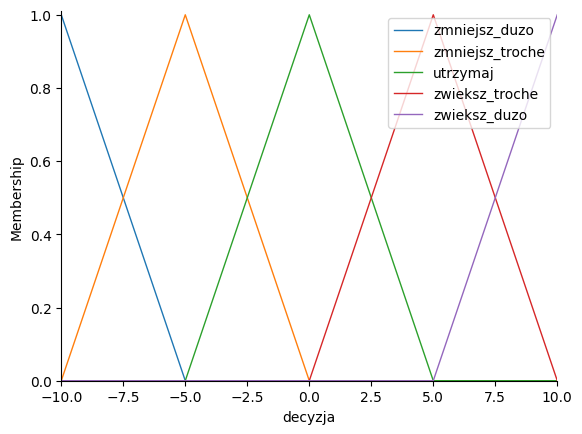

In [3]:
decyzja = ctrl.Consequent(np.arange(-10, 10.1, 0.1), 'decyzja')

decyzja['zmniejsz_duzo'] = fuzz.trimf(decyzja.universe, [-10, -10, -5])
decyzja['zmniejsz_troche'] = fuzz.trimf(decyzja.universe, [-10, -5, 0])
decyzja['utrzymaj'] = fuzz.trimf(decyzja.universe, [-5, 0, 5])
decyzja['zwieksz_troche'] = fuzz.trimf(decyzja.universe, [0, 5, 10])
decyzja['zwieksz_duzo'] = fuzz.trimf(decyzja.universe, [5, 10, 10])

decyzja.view()
plt.legend(loc=1)
plt.show()


### Zbiór zasad

In [4]:
rules = [
    ctrl.Rule(popyt['bardzo_niski'] & zapas['brak'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['brak'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['brak'] & koszt['wysoki'], decyzja['zmniejsz_duzo']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['niski'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['niski'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['niski'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['sredni'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['sredni'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['sredni'] & koszt['wysoki'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['wysoki'] & koszt['niski'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['wysoki'] & koszt['sredni'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['bardzo_niski'] & zapas['wysoki'] & koszt['wysoki'], decyzja['zmniejsz_duzo']),
    
    ctrl.Rule(popyt['niski'] & zapas['brak'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['brak'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['brak'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['niski'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['niski'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['niski'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['sredni'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['sredni'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['sredni'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['niski'] & zapas['wysoki'] & koszt['niski'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['niski'] & zapas['wysoki'] & koszt['sredni'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['niski'] & zapas['wysoki'] & koszt['wysoki'], decyzja['zmniejsz_duzo']),
    
    ctrl.Rule(popyt['sredni'] & zapas['brak'] & koszt['niski'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['sredni'] & zapas['brak'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['brak'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['niski'] & koszt['niski'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['sredni'] & zapas['niski'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['niski'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['sredni'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['sredni'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['sredni'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['sredni'] & zapas['wysoki'] & koszt['niski'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['sredni'] & zapas['wysoki'] & koszt['sredni'], decyzja['zmniejsz_troche']),
    ctrl.Rule(popyt['sredni'] & zapas['wysoki'] & koszt['wysoki'], decyzja['zmniejsz_troche']),
    
    ctrl.Rule(popyt['wysoki'] & zapas['brak'] & koszt['niski'], decyzja['zwieksz_duzo']),
    ctrl.Rule(popyt['wysoki'] & zapas['brak'] & koszt['sredni'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['wysoki'] & zapas['brak'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['niski'] & koszt['niski'], decyzja['zwieksz_duzo']),
    ctrl.Rule(popyt['wysoki'] & zapas['niski'] & koszt['sredni'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['wysoki'] & zapas['niski'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['sredni'] & koszt['niski'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['wysoki'] & zapas['sredni'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['sredni'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['wysoki'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['wysoki'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['wysoki'] & zapas['wysoki'] & koszt['wysoki'], decyzja['utrzymaj']),
    
    ctrl.Rule(popyt['ogromny'] & zapas['brak'] & koszt['niski'], decyzja['zwieksz_duzo']),
    ctrl.Rule(popyt['ogromny'] & zapas['brak'] & koszt['sredni'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['ogromny'] & zapas['brak'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['niski'] & koszt['niski'], decyzja['zwieksz_duzo']),
    ctrl.Rule(popyt['ogromny'] & zapas['niski'] & koszt['sredni'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['ogromny'] & zapas['niski'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['sredni'] & koszt['niski'], decyzja['zwieksz_troche']),
    ctrl.Rule(popyt['ogromny'] & zapas['sredni'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['sredni'] & koszt['wysoki'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['wysoki'] & koszt['niski'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['wysoki'] & koszt['sredni'], decyzja['utrzymaj']),
    ctrl.Rule(popyt['ogromny'] & zapas['wysoki'] & koszt['wysoki'], decyzja['utrzymaj']),
]


W ramach systemu doradczego zaprojektowano 60 reguł rozmytych, które obejmują wszystkie możliwe kombinacje poziomów trzech zmiennych wejściowych: popytu rynkowego (5 poziomów), poziomu zapasów magazynowych (4 poziomy) oraz kosztu produkcji (3 poziomy).

Reguły zostały opracowane na podstawie intuicyjnych zależności biznesowych, takich jak:

wysoki popyt i niski zapas → zwiększenie produkcji,

niski popyt i wysoki zapas → zmniejszenie produkcji,

wysoki koszt → zachowawczość decyzji.

W projekcie zastosowano defuzyfikację metodą środka ciężkości (centroid), będącą domyślną strategią w scikit-fuzzy. Metoda ta oblicza ostateczną rekomendację jako ważoną średnią środków ciężkości aktywowanych funkcji wyjściowych. Dzięki temu system może zwracać wartości pośrednie (np. 6.86), co pozwala na bardziej elastyczne i realistyczne rekomendacje decyzyjne.

### Porównanie metod defuzyfikacji w systemie rozmytym

W celu porównania wpływu różnych metod defuzyfikacji, przeprowadzono analizę dla konkretnego zestawu wejść: popyt = 80, zapas = 20, koszt = 60.
Zestaw ten reprezentuje sytuację, w której występuje wysoki popyt przy niskich zapasach i średnim koszcie produkcji – czyli realny scenariusz, w którym decyzja o zwiększeniu produkcji może być uzasadniona, ale jej skala zależy od interpretacji reguł.

Defuzyfikacja to końcowy etap wnioskowania w systemie rozmytym, polegający na przekształceniu rozmytej odpowiedzi na konkretną wartość liczbową. W analizie porównano pięć najczęściej stosowanych metod:

- Centroid (środek ciężkości): oblicza ważoną średnią ze wszystkich aktywowanych funkcji przynależności. Jest to metoda najbardziej precyzyjna i najczęściej stosowana w praktyce.

- Bisector (środek pola): znajduje taki punkt, który dzieli całkowity obszar wyjściowy na dwie równe części.

- MOM (mean of maximum): zwraca średnią wartość wszystkich punktów, dla których przynależność osiąga maksimum.

- SOM (smallest of maximum): wybiera najmniejszą wartość spośród tych, które mają maksymalny stopień przynależności.

- LOM (largest of maximum): wybiera największą wartość spośród tych, które mają maksymalny stopień przynależności.

Każda z metod może prowadzić do nieco innego wyniku


Metoda defuzyfikacji: CENTROID
Zalecana decyzja: 3.69


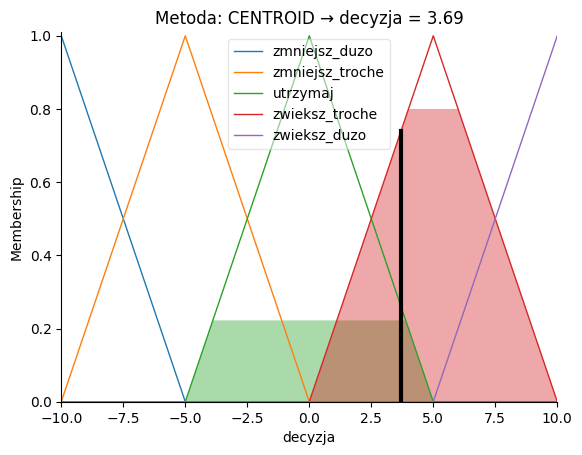


Metoda defuzyfikacji: BISECTOR
Zalecana decyzja: 4.31


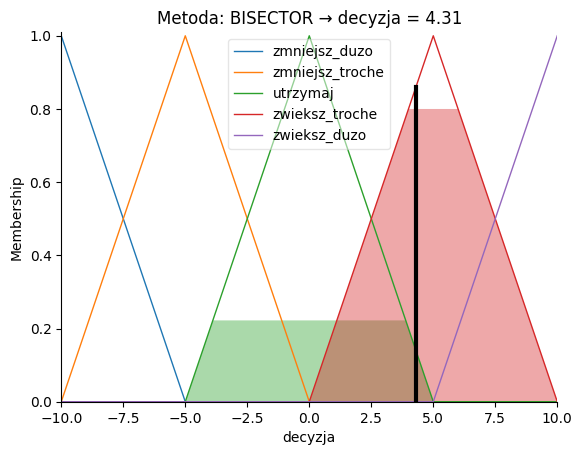


Metoda defuzyfikacji: MOM
Zalecana decyzja: 5.05


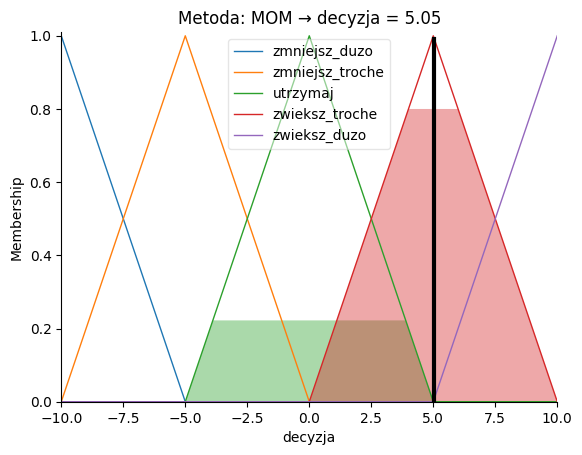


Metoda defuzyfikacji: SOM
Zalecana decyzja: 4.00


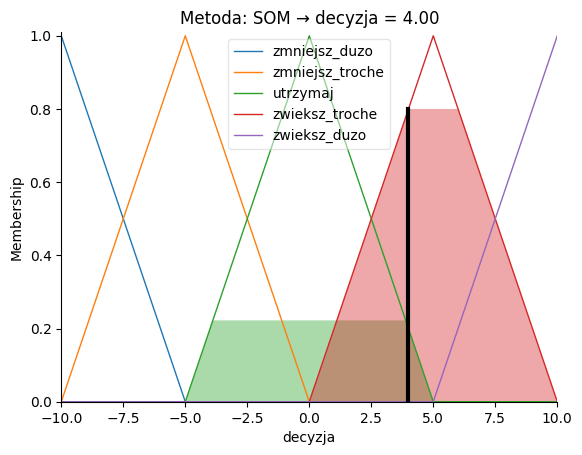


Metoda defuzyfikacji: LOM
Zalecana decyzja: 6.00


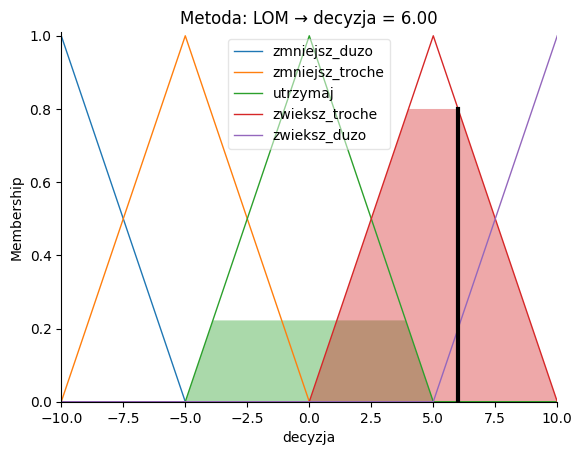

In [5]:
metody = ['centroid', 'bisector', 'mom', 'som', 'lom']

wejscia = {
    'popyt': 80,
    'zapas': 20,
    'koszt': 60
}

for metoda in metody:
    print(f"\nMetoda defuzyfikacji: {metoda.upper()}")

    decyzja.defuzzify_method = metoda

    system_produkcji = ctrl.ControlSystem(rules)
    sim = ctrl.ControlSystemSimulation(system_produkcji)

    for zmienna, wartosc in wejscia.items():
        sim.input[zmienna] = wartosc

    sim.compute()

    print(f"Zalecana decyzja: {sim.output['decyzja']:.2f}")

    decyzja.view(sim=sim)

    plt.title(f"Metoda: {metoda.upper()} → decyzja = {sim.output['decyzja']:.2f}")
    plt.show()

Wnioski:

- Metoda centroid (środek ciężkości) zwróciła wartość znajdującą się pomiędzy funkcjami „utrzymaj” a „zwiększ trochę”. Oznacza to, że system rekomenduje umiarkowane zwiększenie produkcji. Jest to decyzja kompromisowa – uwzględnia zarówno wysoki popyt i niski poziom zapasów, jak i rosnący koszt produkcji.
Metoda centroid uwzględnia wszystkie aktywowane reguły w sposób proporcjonalny, co czyni ją jedną z najbardziej stabilnych i wyważonych metod defuzyfikacji.

- Metoda bisector polega na podziale obszaru aktywowanego przez funkcje przynależności na dwie równe części pod względem pola powierzchni. W tym przypadku wynik wskazuje na wyraźniejszą tendencję do zwiększenia produkcji niż w metodzie centroid, co jest skutkiem przesunięcia środka ciężkości w stronę reguł promujących wzrost.

- Metoda MOM polega na wybraniu średniej arytmetycznej wartości (x) dla których funkcje przynależności osiągają maksymalny stopień aktywacji. W przedstawionym przypadku dominuje funkcja „zwiększ trochę”, stąd końcowa decyzja systemu wyraźnie wskazuje na wzrost produkcji.

- Metoda SOM wybiera najmniejszą wartość (x), dla której funkcja przynależności osiąga maksymalny poziom aktywacji. W tym przypadku maksymalnie aktywna była funkcja „zwiększ trochę”, dlatego system przyjął najniższą możliwą wartość z tego zakresu.
Metoda ta charakteryzuje się ostrożnością – w porównaniu do MOM nie wybiera wartości średniej, lecz dolną granicę


- Metoda LOM wybiera największą wartość (x), dla której funkcja przynależności osiąga maksymalny poziom aktywacji. W tej sytuacji decyzja została ustalona na górną granicę funkcji „zwiększ trochę”.

### Przykłady

Zalecana decyzja produkcyjna: -2.62


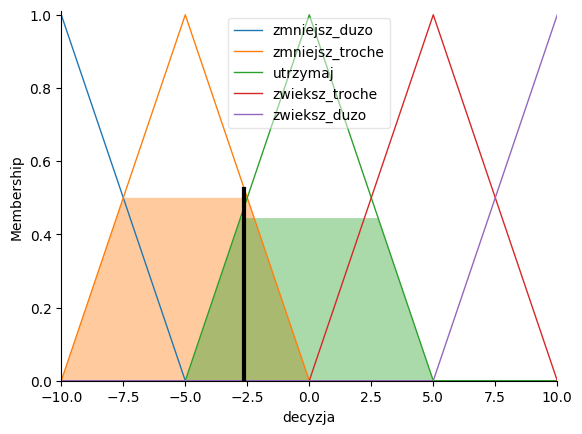

In [6]:
decyzja.defuzzify_method = 'centroid'

system_produkcji = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system_produkcji)

sim.input['popyt'] = 10
sim.input['zapas'] = 80
sim.input['koszt'] = 40

sim.compute()

print(f"Zalecana decyzja produkcyjna: {sim.output['decyzja']:.2f}")
decyzja.view(sim=sim)


Dla przypadku, w którym popyt jest bardzo niski (10%), a poziom zapasów bardzo wysoki (80%), przy umiarkowanym koszcie produkcji (40%), system rozmyty z wykorzystaniem metody centroid wskazał decyzję −2.62, co oznacza, że należy zmniejszyć produkcję o około 20–25%. Jest to rozsądna i proporcjonalna reakcja na warunki rynkowe, pozwalająca ograniczyć nadprodukcję przy zachowaniu kontroli nad kosztami.

Zalecana decyzja produkcyjna: 5.84


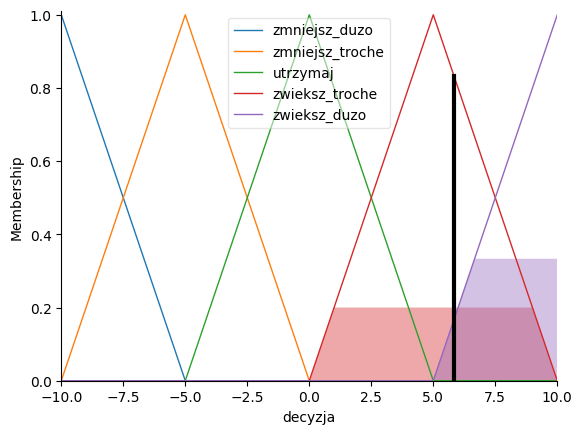

In [7]:
sim.input['popyt'] = 90
sim.input['zapas'] = 10
sim.input['koszt'] = 10
sim.compute()
print(f"Zalecana decyzja produkcyjna: {sim.output['decyzja']:.2f}")
decyzja.view(sim=sim)

Dla przypadku, w którym popyt jest bardzo wysoki (90%), a poziom zapasów bardzo niski (10%), przy niskim koszcie produkcji (10%), system rozmyty z wykorzystaniem metody centroid wskazał decyzję 5.84, co oznacza, że należy zwiększyć produkcję o około 60%. Jest to zgodna z oczekiwaniami reakcja na wysokie zapotrzebowanie i niskie ryzyko kosztowe, umożliwiająca szybką odpowiedź na potrzeby rynku

Zalecana decyzja produkcyjna: 0.00


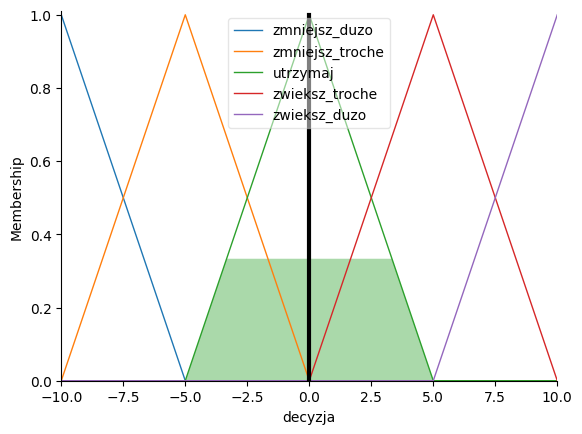

In [8]:
sim.input['popyt'] = 30
sim.input['zapas'] = 10
sim.input['koszt'] = 90
sim.compute()
print(f"Zalecana decyzja produkcyjna: {sim.output['decyzja']:.2f}")
decyzja.view(sim=sim)

Dla przypadku, w którym popyt jest umiarkowanie niski (30%), poziom zapasów bardzo niski (10%), a koszt produkcji bardzo wysoki (90%), system rozmyty z wykorzystaniem metody centroid wskazał decyzję 0.00, co oznacza, że należy utrzymać obecny poziom produkcji. Jest to efekt kompromisu między presją na zwiększenie produkcji wynikającą z niskiego stanu zapasów a wysokimi kosztami, które ograniczają możliwość ekspansji. System zareagował neutralnie, unikając ryzyka zarówno nadprodukcji, jak i niedoboru.

Zalecana decyzja produkcyjna: -5.41


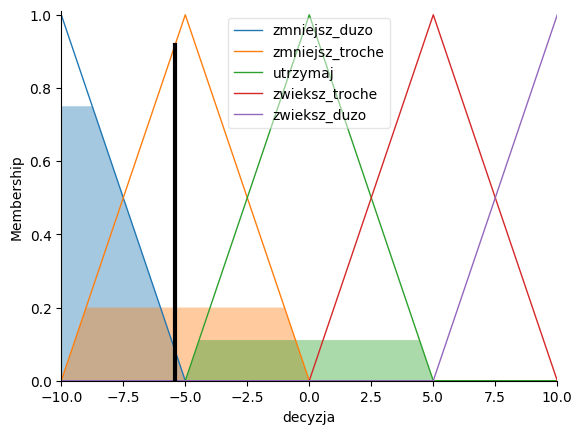

In [9]:
sim.input['popyt'] =5
sim.input['zapas'] = 95
sim.input['koszt'] = 90
sim.compute()
print(f"Zalecana decyzja produkcyjna: {sim.output['decyzja']:.2f}")
decyzja.view(sim=sim)

Dla przypadku, w którym popyt jest bardzo niski (5%), poziom zapasów bardzo wysoki (95%), a koszt produkcji bardzo wysoki (90%), system rozmyty z wykorzystaniem metody centroid wskazał decyzję −5.41, co oznacza, że należy zmniejszyć produkcję o około 50%. Tak silna rekomendacja redukcji jest w pełni uzasadniona — niski popyt nie generuje zapotrzebowania, zapasy są już zgromadzone, a koszt dalszej produkcji jest nieopłacalny.